In [1]:
from multitask_classifier import *

c:\Users\K1191\anaconda3\envs\NLP\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
class DotDict(dict):
    def __getattr__(self, key):
        try:
            return self[key]
        except KeyError:
            raise AttributeError(f"'DotDict' object has no attribute '{key}'")

    def __setattr__(self, key, value):
        self[key] = value

In [7]:
TQDM_DISABLE = False

args_dict = {
    "sst_train": "data/ids-sst-train.csv",
    "sst_dev": "data/ids-sst-dev.csv",
    "sst_test": "data/ids-sst-test-student.csv",

    "para_train": "data/quora-train.csv",
    "para_dev": "data/quora-dev.csv",
    "para_test": "data/quora-test-student.csv",

    "sts_train": "data/sts-train.csv",
    "sts_dev": "data/sts-dev.csv",
    "sts_test": "data/sts-test-student.csv",

    "seed": 11711,
    "epochs": 10,
    "option": "finetune",
    "use_gpu": False,  # Default is False, set to True if required

    "sst_dev_out": "predictions/sst-dev-output.csv",
    "sst_test_out": "predictions/sst-test-output.csv",

    "para_dev_out": "predictions/para-dev-output.csv",
    "para_test_out": "predictions/para-test-output.csv",

    "sts_dev_out": "predictions/sts-dev-output.csv",
    "sts_test_out": "predictions/sts-test-output.csv",

    # hyperparameters
    "batch_size": 8,  # 64 for sst, 8 for cfimdb can fit a 12GB GPU
    "hidden_dropout_prob": 0.3,
    "lr": 1e-5  # 1e-3 for pretrain, 1e-5 for fine-tuning
}

args = DotDict(args_dict)

In [9]:
from multitask_classifier import *
sst_train_data, num_labels_sst, para_train_data, sts_train_data = load_multitask_data(args.sst_train, args.para_train, args.sts_train, split='train')

config = {'hidden_dropout_prob': args.hidden_dropout_prob,
              'num_labels': num_labels_sst,
              'hidden_size': 768,
              'data_dir': '.',
              'option': args.option}

# config = DotDict(config)
config = SimpleNamespace(**config)

model = MultitaskBERT(config)


Loaded 8544 train examples from data/ids-sst-train.csv
Loaded 141498 train examples from data/quora-train.csv
Loaded 6040 train examples from data/sts-train.csv


In [11]:
print(model.parameters)

<bound method Module.parameters of MultitaskBERT(
  (bert): BertModel(
    (word_embedding): Embedding(30522, 768, padding_idx=0)
    (pos_embedding): Embedding(512, 768)
    (tk_type_embedding): Embedding(2, 768)
    (embed_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (embed_dropout): Dropout(p=0.1, inplace=False)
    (bert_layers): ModuleList(
      (0-11): 12 x BertLayer(
        (self_attention): BertSelfAttention(
          (query): Linear(in_features=768, out_features=768, bias=True)
          (key): Linear(in_features=768, out_features=768, bias=True)
          (value): Linear(in_features=768, out_features=768, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (attention_dense): Linear(in_features=768, out_features=768, bias=True)
        (attention_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (attention_dropout): Dropout(p=0.1, inplace=False)
        (interm_dense): Linear(in_features=768, out

In [4]:
# args = get_args()
args.filepath = f'{args.option}-{args.epochs}-{args.lr}-multitask.pt' # save path
seed_everything(args.seed)  # fix the seed for reproducibility

save_metrics = {
    "batch_size": args.batch_size,
    "lr": args.lr,
    "hidden_dropout_prob": args.hidden_dropout_prob,
    "option": args.option,
    "epoch": [],
    "train_loss": [],
    "train_sentiment_acc": [],
    "train_paraphrase_acc": [],
    "train_sts_corr": [],
    "train_avg_normalized_score": [],
    "test_sentiment_accuracy": [], 
    "test_paraphrase_accuracy": [],
    "test_sts_corr": []
}

train_multitask(args, save_metrics)
test_model(args, save_metrics)

MULTITASK = "./stats/multitask_saved_metrics.json"

# Save save_metrics to a JSON file
with open(MULTITASK, 'w') as f:
    json.dump(save_metrics, f, indent=4)

print(f'Metrics saved to {MULTITASK}')

========================Loading data========================
Loaded 8544 train examples from data/ids-sst-train.csv
Loaded 141498 train examples from data/quora-train.csv
Loaded 6040 train examples from data/sts-train.csv
Loaded 1101 train examples from data/ids-sst-dev.csv
Loaded 20212 train examples from data/quora-dev.csv
Loaded 863 train examples from data/sts-dev.csv
========================Data loaded========================
========================Model Created========================
========================Training========================


train-0:   1%|          | 7/1068 [00:27<1:06:52,  3.78s/it]

c:\Users\K1191\anaconda3\envs\NLP\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


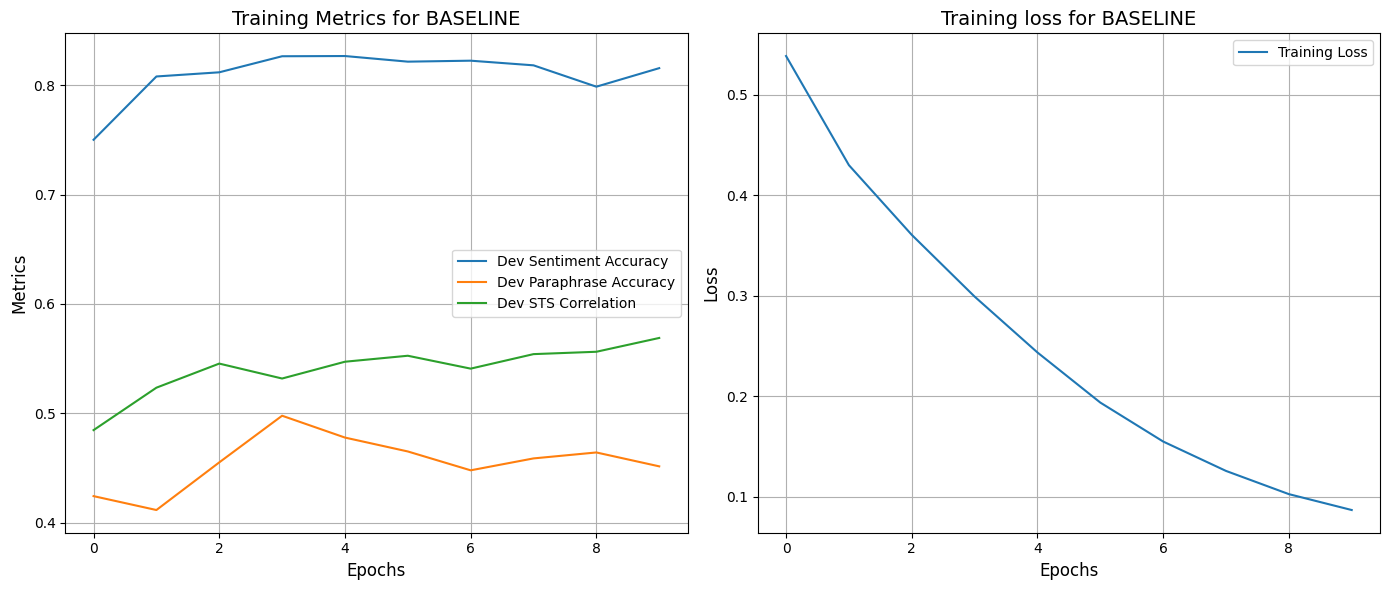

test sentiment accuracy: [0.4977293369663942]
test paraphrase accuracy: [0.8266871165644172]
semantic similarity regression accuracy: [0.5481536959169422]


In [1]:
from utils import *

MULTITASK = "./stats/baseline_metrics.json"
test_sentiment_accuracy, test_paraphrase_accuracy, test_sts_corr = visualize_multitask(MULTITASK)

print(f"test sentiment accuracy: {test_sentiment_accuracy}")
print(f"test paraphrase accuracy: {test_paraphrase_accuracy}")
print(f"semantic similarity regression accuracy: {test_sts_corr}")